# MOVIE RECOMMENDATION SYSTEM
## Using Correlation and Python based on the ratings of Movies

In [17]:
import numpy as np
import pandas as pd

In [11]:
col_name= ['userId','movieId','rating','timestamp']
df= pd.read_csv('ratings.csv', delimiter=',')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Ratings csv 

In [12]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [15]:
movie_titles= pd.read_csv('movies.csv', delimiter=',')
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Movies csv

In [20]:
df= pd.merge(df, movie_titles, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title_x,genres_x,title_y,genres_y
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [48]:
#df.drop(['genres_y'], axis= 1, inplace=True)
#df.head()
df.rename({'title_x': 'title', 'genres_x': 'genre'}, axis=1, inplace = True)

### merged movies.csv and ratings.csv and then dropped the duplicate coloumns along with renamed it properly

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

#### importing visualisation libraries. Matplotlib inline is used so that we see the graphs in this particular jupyter notebook.

In [49]:
df.head()

,userId,movieId,rating,timestamp,title,genre
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [52]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

#### The titles that are showing 5 ratings are not actual good movies.. the reason might be because not many people rated that movie.. therefore their mean is higher. 

In [53]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

##### These movies are most no. of times rated.

In [54]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


#### Grouping the data according to their mean rating.
#### Below adding the count of no. of ratings with the mean ratings

In [55]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<AxesSubplot:>

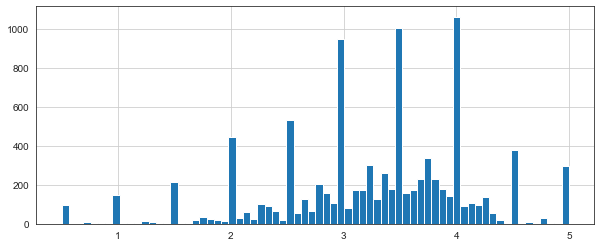

In [56]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)
#shows normal distribution

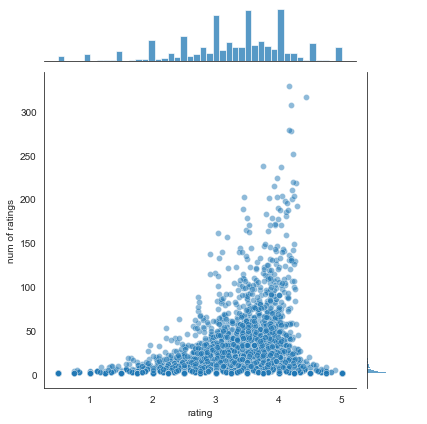

In [57]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

#### this was the basic idea to show how the dataset is distributed and to visualise the dataset. 
#### Now, moving onto the recommendation part.

In [58]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


#### These are the most number of rated movies.
#### Now, to demonstrate the working of the recommendation system, I am choosing 2 movies at random: Jurassic Park (1993) AND Schindler's List (1993).
#### For acheiving the same, I am creating a pivot table according to each userid and inserting their ratings in different coloumns.

In [60]:
moviemat = df.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
j_user_ratings = moviemat['Jurassic Park (1993)']
j_user_ratings.head()


userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Jurassic Park (1993), dtype: float64

In [62]:
similar_to = moviemat.corrwith(j_user_ratings)

C:\Python39\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Python39\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


#### Next I find the correlation between the user ratings and the pivot table to find similar movies.
#### Convert it to a DataFrame and removing NaN values from particular user rating.

In [66]:
corr_j = pd.DataFrame(similar_to,columns=['Correlation'])
corr_j.dropna(inplace=True)
corr_j.head()

,Correlation
title,
"'burbs, The (1989)",0.104077
(500) Days of Summer (2009),-0.125237
*batteries not included (1987),0.290929
...And Justice for All (1979),-0.981981
10 Cent Pistol (2015),-1.000000


In [68]:
corr_j.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
In the Valley of Elah (2007),1.0
The Overnight (2015),1.0
Monkey Business (1952),1.0
"Cup, The (Phörpa) (1999)",1.0
Fear (1996),1.0
Feast (2005),1.0
Police Story 2 (Ging chaat goo si juk jaap) (1988),1.0
Insidious (2010),1.0
"Whistleblower, The (2010)",1.0


#### Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched jurrasic park.
#### Therefore we consider only those movies which has count of total ratings greater than 100

In [69]:
corr_j = corr_j.join(ratings['num of ratings'])
corr_j.head()

,Correlation,num of ratings
title,,
"'burbs, The (1989)",0.104077,17
(500) Days of Summer (2009),-0.125237,42
*batteries not included (1987),0.290929,7
...And Justice for All (1979),-0.981981,3
10 Cent Pistol (2015),-1.000000,2


In [73]:
corr_j[corr_j['num of ratings']>100].sort_values('Correlation', ascending=False).head()


,Correlation,num of ratings
title,,
Jurassic Park (1993),1.000000,238
Outbreak (1995),0.533780,101
Ghostbusters (a.k.a. Ghost Busters) (1984),0.522286,120
"Fugitive, The (1993)",0.460603,190
Indiana Jones and the Temple of Doom (1984),0.456533,108


## Hence, Similar Movies to Jurrasic Park is listed above. 

In [81]:
#model for any movie.
user_ratings = moviemat['Schindler\'s List (1993)']
similar = moviemat.corrwith(user_ratings)
corr_mov = pd.DataFrame(similar,columns=['Correlation'])
corr_mov.dropna(inplace=True)
corr_j.sort_values('Correlation',ascending=False)
corr_mov = corr_mov.join(ratings['num of ratings'])
corr_mov[corr_mov['num of ratings']>100].sort_values('Correlation', ascending=False).head()


C:\Python39\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Python39\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,num of ratings
title,,
Schindler's List (1993),1.000000,220
"Godfather, The (1972)",0.456661,192
Saving Private Ryan (1998),0.430103,188
"Shawshank Redemption, The (1994)",0.402202,317
"Godfather: Part II, The (1974)",0.402173,129
